In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define the custom pastel violet palette ---
PASTEL_VIOLET = ['#b39ddb', '#7e57c2', '#d1c4e9', '#9575cd', '#ede7f6']

# Set plotting style (keeping your preferred style)
sns.set_style('whitegrid')

# --- 1. FILE PATHS & SETUP ---
# Load the model-ready file created in the previous step
input_parquet_file = '../data/electricity/processed/demand_model_ready.parquet'
TARGET_COL = 'nd' # The National Demand is the target variable

print("--- Starting Post-Cleaning Visualization Analysis (Pastel Violet Theme) ---")

# --- 2. LOAD CLEANED DATA ---
try:
    df = pd.read_parquet(input_parquet_file)
    # Re-establish the Datetime Index
    if 'index' in df.columns:
        df.set_index('index', inplace=True)
        df.index.name = 'datetime'
        df.index = pd.to_datetime(df.index)
        
    if TARGET_COL not in df.columns:
        print(f"\nERROR: Target column '{TARGET_COL}' not found. Check if it was dropped in 03_final_prep.")
        exit()

    print(f"1. Data Loaded Successfully. Target: {TARGET_COL.upper()}. Shape: {df.shape}")
except FileNotFoundError:
    print(f"\nERROR: Model-ready file not found at {input_parquet_file}.")
    print("ACTION REQUIRED: Run 03_final_prep.ipynb first.")
    exit()

--- Starting Post-Cleaning Visualization Analysis (Pastel Violet Theme) ---
1. Data Loaded Successfully. Target: ND. Shape: (434590, 30)



--- 3.1 Target Variable Distribution ---


c:\Users\neila\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


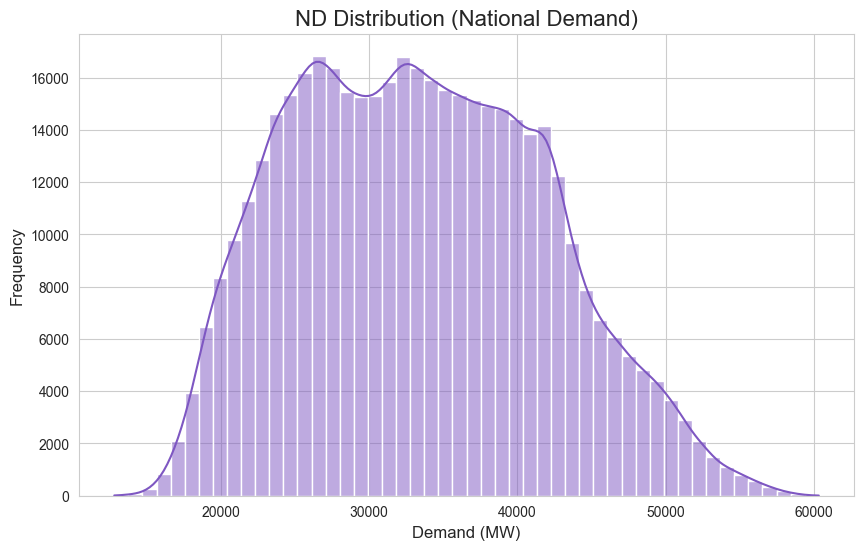

In [8]:
# --- 3. TARGET VARIABLE DISTRIBUTION ---

print("\n--- 3.1 Target Variable Distribution ---")
plt.figure(figsize=(10, 6))
# Using a specific color from the palette for the histogram
sns.histplot(df[TARGET_COL], bins=50, kde=True, color=PASTEL_VIOLET[1])
plt.title(f'{TARGET_COL.upper()} Distribution (National Demand)', fontsize=16)
plt.xlabel('Demand (MW)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()


--- 4.1 Long-Term Annual Demand Trend ---


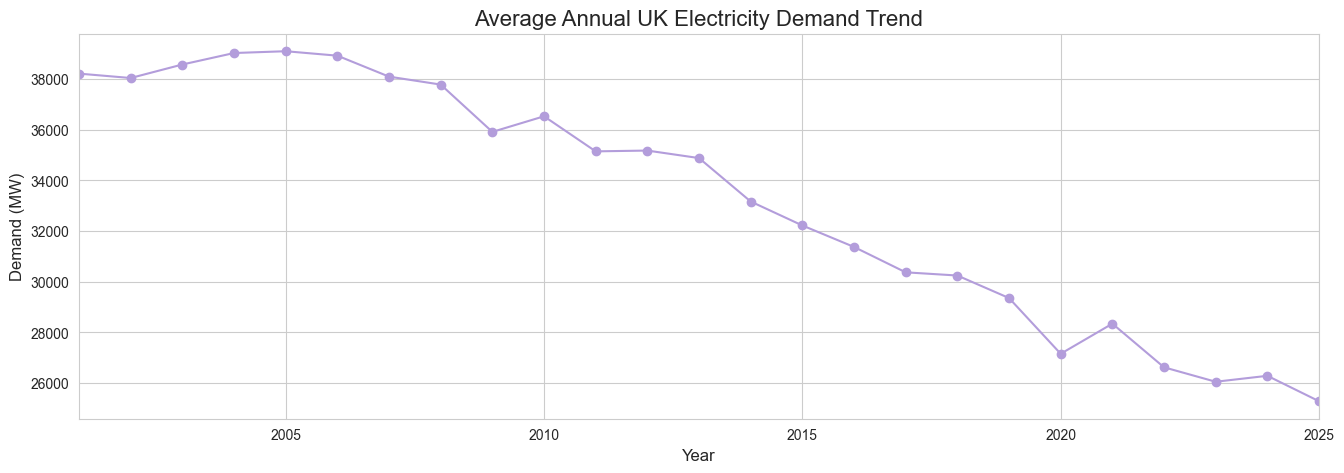


--- 4.2 Weekly/Daily Cycle Sample ---


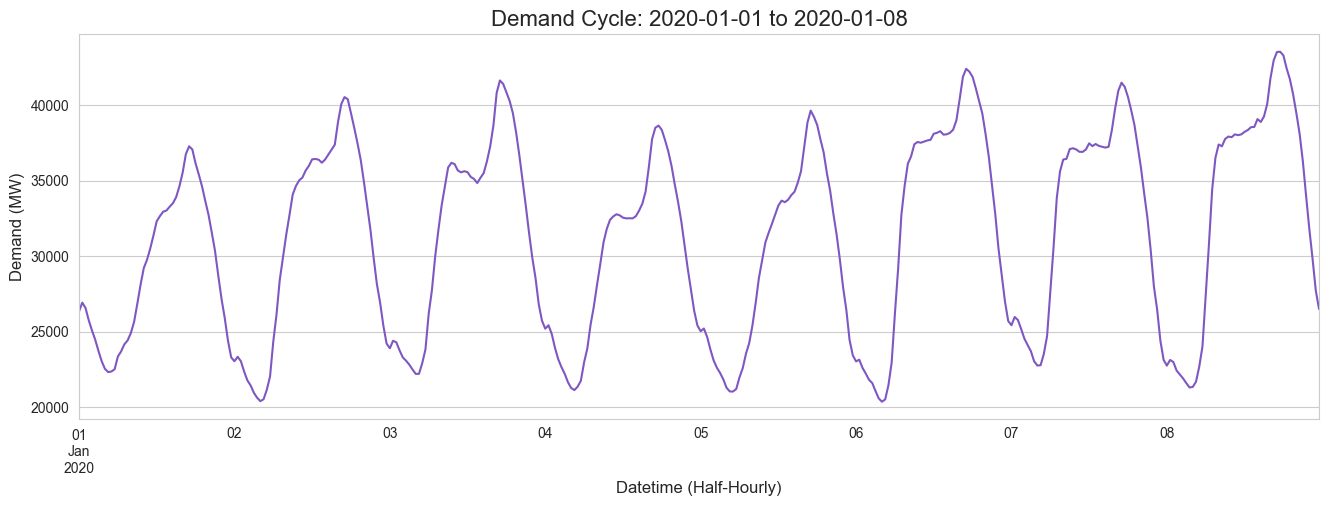

In [9]:
# --- 4. TIME TRENDS ---

# 4.1. Long-Term Trend (Annual Resampling)
print("\n--- 4.1 Long-Term Annual Demand Trend ---")
plt.figure(figsize=(16, 5))
# Use color=PASTEL_VIOLET[0] for the line plot
df[TARGET_COL].resample('Y').mean().plot(marker='o', linestyle='-', color=PASTEL_VIOLET[0])
plt.title('Average Annual UK Electricity Demand Trend', fontsize=16)
plt.ylabel('Demand (MW)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True)
plt.show()

# 4.2. Short-Term Trend (Sample a single winter week to see the daily cycle)
print("\n--- 4.2 Weekly/Daily Cycle Sample ---")
# Pick a week in a recent year (adjust if your data ends earlier)
sample_start = '2020-01-01' 
sample_end = '2020-01-08'
df_sample = df.loc[sample_start:sample_end]

plt.figure(figsize=(16, 5))
# Use color=PASTEL_VIOLET[1] for the sample trend
df_sample[TARGET_COL].plot(color=PASTEL_VIOLET[1])
plt.title(f'Demand Cycle: {sample_start} to {sample_end}', fontsize=16)
plt.ylabel('Demand (MW)', fontsize=12)
plt.xlabel('Datetime (Half-Hourly)', fontsize=12)
plt.grid(True)
plt.show()


--- 5.1 Monthly Demand Distribution ---


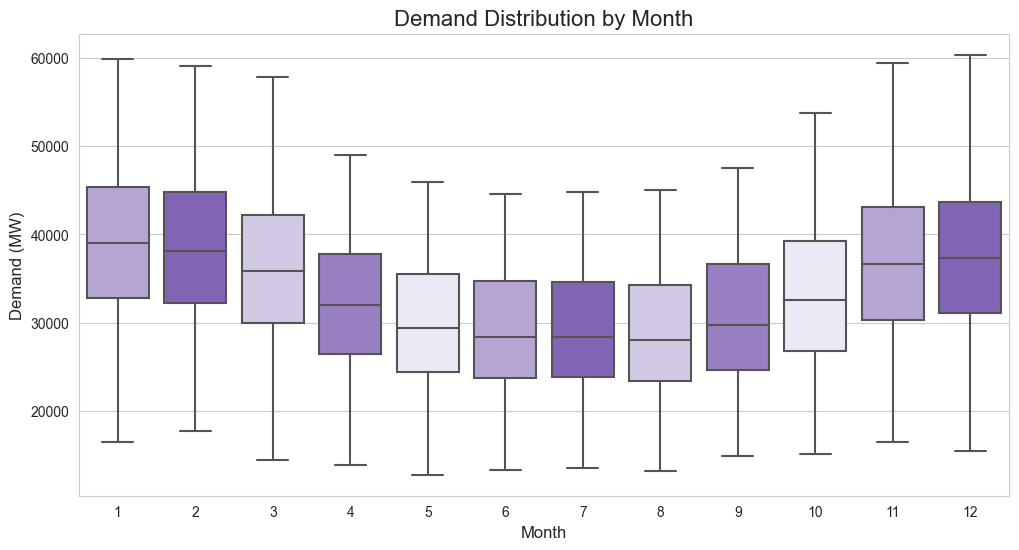


--- 5.2 Hourly Demand Profile (Weekday vs. Weekend) ---


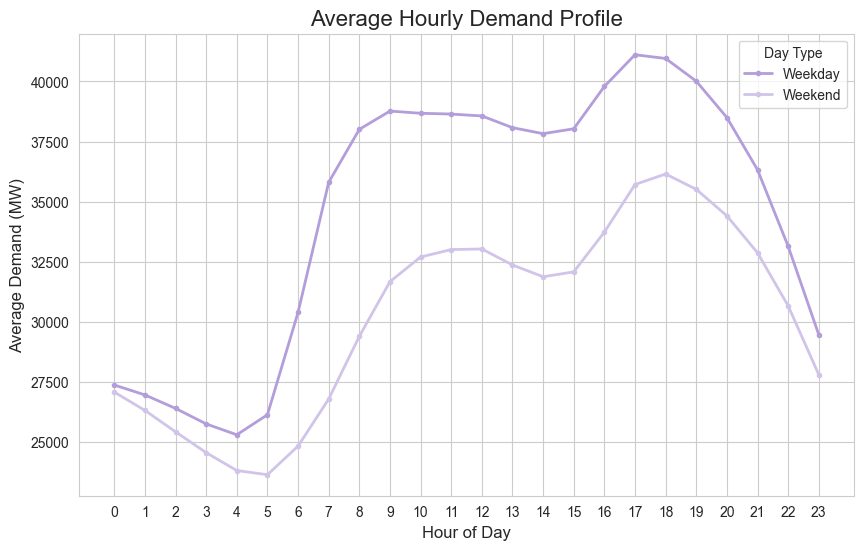


--- Visualization Analysis Complete! ---
The data is verified: trends, annual seasonality, and hourly cycles are clearly visible and ready for modeling.


In [10]:
# --- 5. SEASONALITY ---

# 5.1. Monthly Seasonality (Using the extracted 'month' feature)
print("\n--- 5.1 Monthly Demand Distribution ---")
plt.figure(figsize=(12, 6))
# Boxplot uses the custom pastel violet palette
sns.boxplot(x='month', y=TARGET_COL, data=df.reset_index(), palette=PASTEL_VIOLET)
plt.title('Demand Distribution by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Demand (MW)', fontsize=12)
plt.show()


# 5.2. Hourly Seasonality (Weekday vs. Weekend)
print("\n--- 5.2 Hourly Demand Profile (Weekday vs. Weekend) ---")
# Calculate the average demand by hour, separated by the 'is_weekend' flag
hourly_profile = df.reset_index().groupby(['hour', 'is_weekend'])[TARGET_COL].mean().unstack()

plt.figure(figsize=(10, 6))
# Explicitly using colors from the palette list for the two lines
hourly_profile[0].plot(label='Weekday', marker='.', linewidth=2, color=PASTEL_VIOLET[0])
hourly_profile[1].plot(label='Weekend', marker='.', linewidth=2, color=PASTEL_VIOLET[2])
plt.title('Average Hourly Demand Profile', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Demand (MW)', fontsize=12)
plt.legend(title='Day Type')
plt.grid(True)
plt.xticks(range(24))
plt.show()

print("\n--- Visualization Analysis Complete! ---")
print("The data is verified: trends, annual seasonality, and hourly cycles are clearly visible and ready for modeling.")